/var/folders/k6/gg0yxj7x0tg9nllqx2xkm2rw0000gn/T/ipykernel_23920/2769757356.py:5: DeprecationWarning: Please use `uniform_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import uniform_filter1d


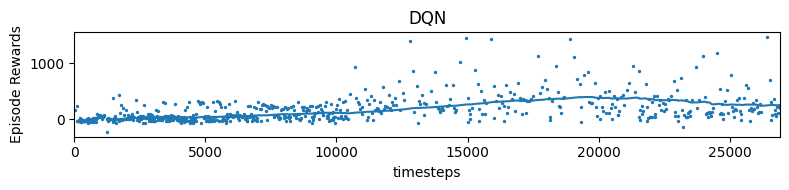

In [11]:
from stable_baselines3.common import results_plotter
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results
import matplotlib.pyplot as plt 
import numpy as np
from scipy.ndimage.filters import uniform_filter1d

log_dir = "figures/models/"
timesteps = 30000
plot_results([log_dir], timesteps, results_plotter.X_TIMESTEPS, "DQN")

In [22]:
std_rewards = [
    55.786794136246975,  # 1000 timesteps
    1.1757550765359257,  # 2000 timesteps
    55.339765088044956,  # 3000 timesteps
    46.2972316067396,    # 4000 timesteps
    20.99892805933672,   # 5000 timesteps
    47.07638886889513,   # 6000 timesteps
    13.00088830327048,   # 7000 timesteps
    2.109942571792089,   # 8000 timesteps
    10.188113593186462,  # 9000 timesteps
    12.374751489043918,  # 10000 timesteps
    36.58084420919626,   # 11000 timesteps
    23.97840312977012,   # 12000 timesteps
    7.607846773951431,   # 13000 timesteps
    13.168358061204101,  # 14000 timesteps
    39.364865664269936,  # 15000 timesteps
    10.04752711322369,   # 16000 timesteps
    14.201353209702978,  # 17000 timesteps
    5.758739926257291,   # 18000 timesteps
    26.010487558984825,  # 19000 timesteps
    8.331630791482805,   # 20000 timesteps
    5.965781192725755,   # 21000 timesteps
    22.33322753651529,   # 22000 timesteps
    6.073619627566494,   # 23000 timesteps
    1.6331513194147258,  # 24000 timesteps
    21.273456240625465,  # 25000 timesteps
    10.209418185113304,  # 26000 timesteps
    6.123465253703719,   # 27000 timesteps
    2.591106013946669    # 28000 timesteps
]

avg_rewards = [25.44, -86.24, 9.52, -15.12, 125.52, 112.3, -12.8, 45.68, 25.9, 38.46, -25.4, 74.88, 55.74, 42.92, 10.38, 62.14, 85.32, 19.26, -4.56, 50.78, 44.6, 60.48, 32.82, -8.24, 105.38, 20.7, 85.6]


# Data provided
timesteps = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000]
avg_rewards = [25.44, -86.24, 9.52, -15.12, 125.52, 112.3, -12.8, 45.68, 25.9, 38.46, -25.4, 74.88, 55.74, 42.92, 10.38, 62.14, 85.32, 19.26, -4.56, 50.78, 44.6, 60.48, 32.82, -8.24, 105.38, 20.7, 85.6]
avg_survival_times = [21.34539647102356, 3.30808030128479, 18.983094329833985, 14.95887481689453, 38.326298246383665, 35.74929329490662, 5.284092426300049, 17.29463243484497, 15.463287353515625, 19.423420906066895, 10.508321762084961, 22.71315574645996, 17.963293075561523, 15.574896812438965, 7.091182708740234, 21.136451721191406, 28.02550506591797, 12.352151870727539, 8.578543663024902, 18.927576065063477, 16.12896156311035, 20.675039291381836, 13.623632431030273, 6.929466724395752, 32.89570617675781, 12.041657447814941, 28.572837829589844]


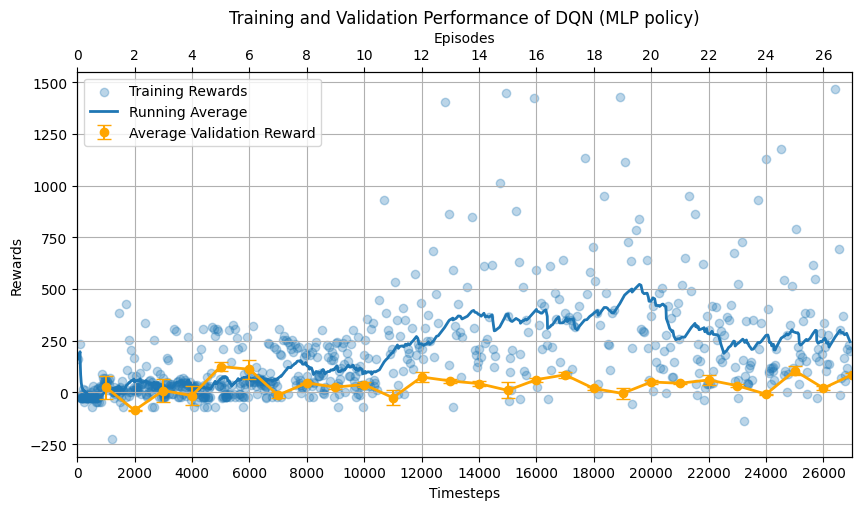

In [38]:
# Provided data
timesteps_data = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000]
avg_rewards = [25.44, -86.24, 9.52, -15.12, 125.52, 112.3, -12.8, 45.68, 25.9, 38.46, -25.4, 74.88, 55.74, 42.92, 10.38, 62.14, 85.32, 19.26, -4.56, 50.78, 44.6, 60.48, 32.82, -8.24, 105.38, 20.7, 85.6]
std_rewards = [55.786794136246975, 1.1757550765359257, 55.339765088044956, 46.2972316067396, 20.99892805933672, 47.07638886889513, 13.00088830327048, 2.109942571792089, 10.188113593186462, 12.374751489043918, 36.58084420919626, 23.97840312977012, 7.607846773951431, 13.168358061204101, 39.364865664269936, 10.04752711322369, 14.201353209702978, 5.758739926257291, 26.010487558984825, 8.331630791482805, 5.965781192725755, 22.33322753651529, 6.073619627566494, 1.6331513194147258, 21.273456240625465, 10.209418185113304, 6.123465253703719]

# Assuming 'results' and 'load_results' and 'ts2xy' are defined elsewhere as in the original code
timesteps = 27000

# Load results
results = load_results(log_dir)
x, y = ts2xy(results, 'timesteps')

# Filter out data points beyond the specified timesteps
mask = x <= timesteps
x, y = x[mask], y[mask]

# Calculate running average
window_size = 25  # Adjust the window size for smoothing

# Initialize the running average array
y_avg = np.zeros_like(y, dtype=float)
for i in range(len(y)):
    y_avg[i] = np.mean(y[max(0, i - window_size + 1):i + 1])

# Plotting the results
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot training rewards and running average on the primary x-axis
ax1.scatter(x, y, alpha=0.3, label='Training Rewards')
ax1.plot(x, y_avg, c='#1f77b4', label='Running Average', linewidth=2)

# Plot trend line (smoothed average rewards) with error bars
ax1.errorbar(timesteps_data, avg_rewards, yerr=std_rewards, fmt='o', color='orange', label='Average Validation Reward', capsize=5)
ax1.plot(timesteps_data, avg_rewards, c='orange', linewidth=2)

# Set primary x-axis ticks and limits
ax1.set_xticks(np.arange(0, timesteps + 1, 2000))
ax1.set_xlim(0, timesteps)
ax1.set_xlabel('Timesteps')
ax1.set_ylabel('Rewards')
ax1.set_title('Training and Validation Performance of DQN (MLP policy)')

# Add a secondary x-axis for episode numbers
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(ax1.get_xticks())
ax2.set_xticklabels((ax1.get_xticks() / 1000).astype(int))
ax2.set_xlabel('Episodes')

# Add legends and grid
ax1.legend(loc='upper left')
ax1.grid(True)

plt.savefig('T1_training_validation.pdf', bbox_inches='tight')

plt.show()

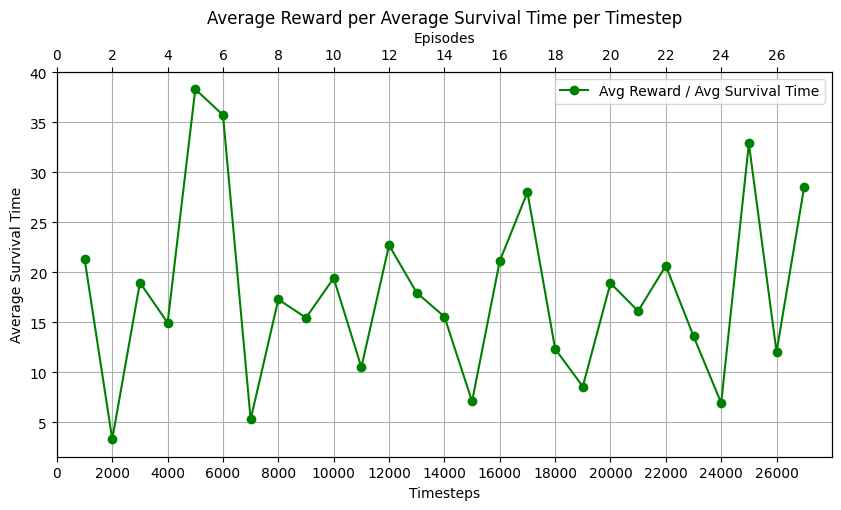

In [30]:
# Data provided
timesteps = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000]
avg_rewards = [25.44, -86.24, 9.52, -15.12, 125.52, 112.3, -12.8, 45.68, 25.9, 38.46, -25.4, 74.88, 55.74, 42.92, 10.38, 62.14, 85.32, 19.26, -4.56, 50.78, 44.6, 60.48, 32.82, -8.24, 105.38, 20.7, 85.6]
avg_survival_times = [21.34539647102356, 3.30808030128479, 18.983094329833985, 14.95887481689453, 38.326298246383665, 35.74929329490662, 5.284092426300049, 17.29463243484497, 15.463287353515625, 19.423420906066895, 10.508321762084961, 22.71315574645996, 17.963293075561523, 15.574896812438965, 7.091182708740234, 21.136451721191406, 28.02550506591797, 12.352151870727539, 8.578543663024902, 18.927576065063477, 16.12896156311035, 20.675039291381836, 13.623632431030273, 6.929466724395752, 32.89570617675781, 12.041657447814941, 28.572837829589844]

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot average reward per average survival time
ax1.plot(timesteps, avg_survival_times, marker='o', linestyle='-', color='green', label='Avg Reward / Avg Survival Time')

# Set the primary x-axis ticks and limits
ax1.set_xticks(np.arange(0, max(timesteps) + 1000, 2000))
ax1.set_xlim(0, max(timesteps) + 1000)
ax1.set_xlabel('Timesteps')
ax1.set_ylabel('Average Survival Time')
ax1.set_title('Average Reward per Average Survival Time per Timestep')

# Add a secondary x-axis for episode numbers
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(ax1.get_xticks())
ax2.set_xticklabels((ax1.get_xticks() / 1000).astype(int))
ax2.set_xlabel('Episodes')

# Add legends and grid
ax1.legend(loc='upper right')
ax1.grid(True)

plt.show()

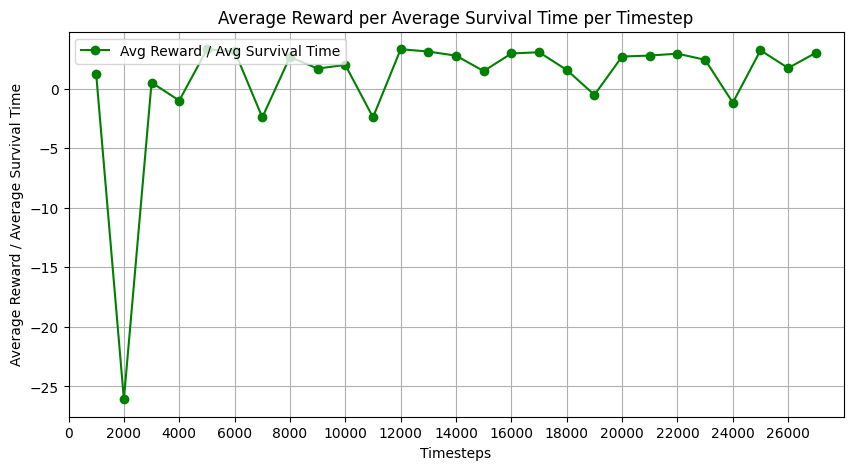

In [6]:

# Calculate average reward per average survival time
avg_reward_per_time = [avg_rewards[i] / avg_survival_times[i] for i in range(len(timesteps))]

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot average reward per average survival time
ax1.plot(timesteps, avg_reward_per_time, marker='o', linestyle='-', color='green', label='Avg Reward / Avg Survival Time')

# Set the primary x-axis ticks and limits
ax1.set_xticks(np.arange(0, max(timesteps) + 1000, 2000))
ax1.set_xlim(0, max(timesteps) + 1000)
ax1.set_xlabel('Timesteps')
ax1.set_ylabel('Average Reward / Average Survival Time')
ax1.set_title('Average Reward per Average Survival Time per Timestep')

# Add a secondary x-axis for episode numbers
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(ax1.get_xticks())
ax2.set_xticklabels((ax1.get_xticks() / 1000).astype(int))
ax2.set_xlabel('Episodes')

# Add legends and grid
ax1.legend(loc='upper left')
ax1.grid(True)

plt.show()



ValueError: x and y must have same first dimension, but have shapes (1,) and (27,)

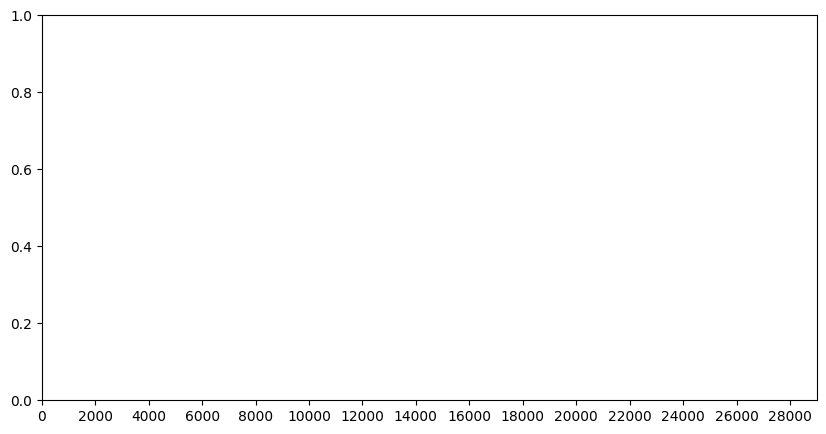

In [41]:
# Calculate average reward per average survival time for the second plot
avg_reward_per_time = [avg_rewards[i] / avg_survival_times[i] for i in range(27)]

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 5))


ax1.set_xticks(np.arange(0, 28000 + 1000, 2000))
ax1.set_xlim(0, 28000 + 1000)

# Plot 1: Average Reward per Average Survival Time
ax1.plot(timesteps, avg_survival_times, marker='o', linestyle='-', color='orange', label='Avg Survival Time')
ax1.plot(timesteps, avg_reward_per_time, marker='o', linestyle='-', color='#1f77b4', label='Avg Reward / Avg Survival Time')
ax1.set_ylabel('Average Survival Time')
ax1.set_title('Comparison of Reward to Survival Time')
ax1.legend()
ax1.grid(True)

# Add a secondary x-axis for episode numbers
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(ax1.get_xticks())
ax2.set_xticklabels((ax1.get_xticks() / 1000).astype(int))
ax2.set_xlabel('Episodes')

plt.tight_layout()


plt.savefig('T1_survival.pdf', bbox_inches='tight')

plt.show()

In [ ]:
Results for model saved at 1000 timesteps:
Max reward: 158
Min reward: -80
STD reward: 55.786794136246975
Avg reward: 25.44
Max survival time: 40.07015419006348
Min survival time: 4.445048093795776
Avg survival time: 21.34539647102356
All survival time: [31.978962898254395, 15.776546716690063, 9.980059385299683, 23.519612073898315, 23.621257066726685, 23.79888367652893, 13.480383396148682, 20.26267409324646, 40.07015419006348, 23.40727972984314, 23.499964475631714, 33.59972524642944, 15.609110832214355, 36.867507219314575, 19.987531423568726, 23.208213567733765, 28.82089114189148, 23.62675142288208, 17.689709663391113, 19.013455390930176, 6.665097951889038, 4.445048093795776, 23.516048431396484, 8.910248041152954, 22.27979564666748]
All rewards: [90, -18, -44, 44, 44, 44, -20, 24, 158, 44, 44, 96, -28, 106, 20, 44, 80, 44, -26, 16, -62, -80, 44, -50, 22]
Wrapping the env in a DummyVecEnv.
Results for model saved at 2000 timesteps:
Max reward: -86
Min reward: -92
STD reward: 1.1757550765359257
Avg reward: -86.24
Max survival time: 3.4072134494781494
Min survival time: 2.2224466800689697
Avg survival time: 3.30808030128479
All survival time: [3.3670010566711426, 3.3728322982788086, 3.353515625, 3.3527889251708984, 3.3407557010650635, 3.3158388137817383, 3.3569300174713135, 3.3689537048339844, 3.34415602684021, 2.2224466800689697, 3.382683277130127, 3.2562615871429443, 3.3478775024414062, 3.305600881576538, 3.4014551639556885, 3.3928802013397217, 3.349745988845825, 3.4072134494781494, 3.338477849960327, 3.302314519882202, 3.328341484069824, 3.4050583839416504, 3.354544162750244, 3.3296780586242676, 3.404656171798706]
All rewards: [-86, -86, -86, -86, -86, -86, -86, -86, -86, -92, -86, -86, -86, -86, -86, -86, -86, -86, -86, -86, -86, -86, -86, -86, -86]
Wrapping the env in a DummyVecEnv.
Results for model saved at 3000 timesteps:
Max reward: 208
Min reward: -86
STD reward: 55.339765088044956
Avg reward: 9.52
Max survival time: 46.1765992641449
Min survival time: 3.2343602180480957
Avg survival time: 18.983094329833985
All survival time: [14.441077709197998, 14.14898419380188, 14.130844593048096, 3.2343602180480957, 19.917881727218628, 24.296882152557373, 18.950202226638794, 23.13009238243103, 36.44130611419678, 17.62483024597168, 13.407901287078857, 20.447181224822998, 14.148876428604126, 20.06215763092041, 26.49560856819153, 14.13439679145813, 11.837483882904053, 15.749502420425415, 8.049235105514526, 19.78542995452881, 18.551149129867554, 19.592642545700073, 20.636951446533203, 19.185781002044678, 46.1765992641449]
All rewards: [-12, -12, -12, -86, 2, 16, 2, 28, 132, 8, -20, 34, -12, 2, 42, -12, -26, -12, -66, 8, 4, 18, 2, 2, 208]
Wrapping the env in a DummyVecEnv.
Results for model saved at 4000 timesteps:
Max reward: 48
Min reward: -86
STD reward: 34.56740661374527
Avg reward: -15.12
Max survival time: 22.8527889251709
Min survival time: 3.2755446434020996
Avg survival time: 14.95887481689453
All survival time: [14.189626932144165, 14.713671684265137, 19.566320657730103, 15.335428714752197, 16.670013427734375, 6.5473504066467285, 18.18133854866028, 19.451507329940796, 22.4038827419281, 16.421374559402466, 15.254359722137451, 22.8527889251709, 6.500991582870483, 3.2755446434020996, 14.203838109970093, 16.275376796722412, 22.383679151535034, 15.318702697753906, 6.553338527679443, 6.5549070835113525, 14.195215225219727, 20.39541220664978, 6.504410266876221, 18.60205054283142, 21.620739936828613]
All rewards: [-12, -12, 10, -4, -10, -76, 10, -4, 12, 2, -4, 48, -64, -86, -12, 4, 42, -4, -62, -64, -12, -2, -72, -4, -2]
Wrapping the env in a DummyVecEnv.
Results for model saved at 5000 timesteps:
Max reward: 380
Min reward: -86
STD reward: 103.51313733048573
Avg reward: 125.52
Max survival time: 71.51395869255066
Min survival time: 3.9829421043395996
Avg survival time: 38.326298246383665
All survival time: [52.73602867126465, 49.829487562179565, 15.309448957443237, 47.536932945251465, 22.2004611492157, 57.18595480918884, 28.865907669067383, 44.05614972114563, 39.056225061416626, 20.067028522491455, 45.01852631568909, 44.20486855506897, 19.895825147628784, 71.51395869255066, 18.291260480880737, 61.70294141769409, 21.67342472076416, 23.57002091407776, 3.9829421043395996, 49.91605806350708, 50.42458176612854, 48.76390981674194, 52.275325298309326, 23.902222156524658, 46.17796564102173]
All rewards: [182, 194, -6, 164, 16, 166, 42, 194, 162, 24, 190, 194, 24, 380, 8, 202, 38, 24, -86, 212, 208, 118, 242, 52, 194]
Wrapping the env in a DummyVecEnv.
Results for model saved at 6000 timesteps:
Max reward: 236
Min reward: -86
STD reward: 91.65933449463834
Avg reward: 106.08
Max survival time: 57.626384973526
Min survival time: 3.285515546798706
Avg survival time: 34.29104364395142
All survival time: [26.617442846298218, 43.78316617012024, 22.10311794281006, 55.21123814582825, 48.57422161102295, 47.399060010910034, 50.03814148902893, 14.139277219772339, 51.02181577682495, 44.39367628097534, 52.33167505264282, 19.86855721473694, 22.15653419494629, 27.701964855194092, 57.626384973526, 16.326488256454468, 21.79303526878357, 20.689393758773804, 28.34040927886963, 29.863865613937378, 44.82883048057556, 42.710267305374146, 45.13695192337036, 3.285515546798706, 21.335059881210327]
All rewards: [38, 168, 38, 184, 160, 208, 236, -12, 236, 194, 222, 24, 22, 72, 170, 0, 38, 34, 40, 72, 194, 176, 194, -86, 30]
Wrapping the env in a DummyVecEnv.
Results for model saved at 7000 timesteps:
Max reward: 224
Min reward: -86
STD reward: 104.11980791376826
Avg reward: 85.84
Max survival time: 54.315213203430176
Min survival time: 3.295311689376831
Avg survival time: 30.175640411376953
All survival time: [23.594890356063843, 49.04446816444397, 41.26682424545288, 19.049683809280396, 6.713831186294556, 40.17142653465271, 43.82422137260437, 14.635734558105469, 40.426984786987305, 43.72138738632202, 3.295311689376831, 32.342214822769165, 19.079691886901855, 20.25778341293335, 3.3357162475585938, 6.764035224914551, 49.4440803527832, 39.22293496131897, 35.18940281867981, 49.819661140441895, 47.549880027770996, 35.13887286186218, 54.315213203430176, 19.19927954673767, 16.98747968673706]
All rewards: [18, 220, 168, 14, -66, 158, 180, -14, 156, 180, -86, 82, 14, 22, -86, -66, 222, 146, 118, 202, 208, 118, 224, 14, 0]
Wrapping the env in a DummyVecEnv.
Results for model saved at 8000 timesteps:
Max reward: 192
Min reward: -92
STD reward: 75.09124050113968
Avg reward: 28.16
Max survival time: 49.521079540252686
Min survival time: 2.2226626873016357
Avg survival time: 22.591045093536376
All survival time: [19.334272623062134, 49.521079540252686, 21.391791105270386, 19.16491937637329, 32.91765832901001, 19.235605001449585, 19.25883674621582, 19.145139455795288, 3.420750856399536, 19.276901721954346, 31.65547490119934, 44.06348466873169, 45.26658892631531, 19.244218111038208, 19.4321129322052, 21.552316188812256, 2.2226626873016357, 13.701462984085083, 6.8032379150390625, 6.75834321975708, 22.728207111358643, 19.34328055381775, 28.45122504234314, 19.175968170166016, 41.71058917045593]
All rewards: [14, 192, 28, 14, 104, 14, 14, 14, -86, 14, -10, 170, 192, 14, 14, 6, -92, -22, -64, -66, 36, 14, 50, 14, 126]
Wrapping the env in a DummyVecEnv.
Results for model saved at 9000 timesteps:
Max reward: 232
Min reward: -86
STD reward: 55.89395673952596
Avg reward: 7.84
Max survival time: 52.09812331199646
Min survival time: 3.444308042526245
Avg survival time: 19.214464778900147
All survival time: [52.09812331199646, 17.060162782669067, 23.66702699661255, 40.74838399887085, 15.768986940383911, 17.003648042678833, 6.81146764755249, 31.66597843170166, 15.790807723999023, 15.71192479133606, 15.726525783538818, 15.876818895339966, 15.847989559173584, 15.778249025344849, 3.444308042526245, 15.771435022354126, 15.766215324401855, 15.860304355621338, 15.861607551574707, 25.93153190612793, 21.424879550933838, 15.853084325790405, 15.8405122756958, 19.239842176437378, 15.811805009841919]
All rewards: [232, 0, 18, -6, -6, 0, -66, 96, -6, -6, -6, -6, -6, -8, -86, -6, -6, -6, -6, 56, 26, -6, -6, 12, -6]
Wrapping the env in a DummyVecEnv.
Results for model saved at 10000 timesteps:
Max reward: 218
Min reward: -86
STD reward: 88.19200870827244
Avg reward: 19.36
Max survival time: 50.1458957195282
Min survival time: 3.3503177165985107
Avg survival time: 19.767266759872438
All survival time: [3.3503177165985107, 15.80374026298523, 17.86459183692932, 17.002987146377563, 15.902334690093994, 3.374798536300659, 15.755950927734375, 5.570075988769531, 15.781397581100464, 15.964576482772827, 45.13129210472107, 44.037296533584595, 3.3528664112091064, 15.977893114089966, 6.690444707870483, 15.753015518188477, 37.30126643180847, 15.856359243392944, 15.824720859527588, 15.841516256332397, 19.16077709197998, 46.43536162376404, 50.1458957195282, 15.925804138183594, 20.37638807296753]
All rewards: [-86, -6, 6, -2, -6, -86, -6, -72, -6, -6, 190, 176, -86, -6, -66, -6, 134, -6, -6, -6, 2, 196, 218, -6, 26]
Wrapping the env in a DummyVecEnv.
Results for model saved at 11000 timesteps:
Max reward: 640
Min reward: -74
STD reward: 189.18377943153584
Avg reward: 224.24
Max survival time: 138.46336030960083
Min survival time: 5.70939564704895
Avg survival time: 54.13797625541687
All survival time: [42.814746379852295, 61.143149852752686, 54.13948464393616, 32.76016426086426, 48.68482708930969, 51.05650281906128, 113.56121444702148, 44.33128476142883, 6.774991512298584, 29.353209495544434, 49.854663372039795, 127.05730104446411, 44.15605854988098, 62.281736612319946, 48.740859508514404, 44.25118041038513, 17.991562604904175, 138.46336030960083, 5.70939564704895, 20.377130270004272, 45.26742362976074, 59.034698724746704, 17.169821977615356, 73.76909565925598, 114.70554280281067]
All rewards: [160, 292, 238, 110, 212, 228, 546, 186, -64, 82, 222, 620, 186, 296, 214, 186, 10, 640, -74, 22, 180, 266, 2, 326, 520]
Wrapping the env in a DummyVecEnv.
Results for model saved at 12000 timesteps:
Max reward: 636
Min reward: -66
STD reward: 168.17811510419543
Avg reward: 185.04
Max survival time: 121.09181094169617
Min survival time: 6.92962384223938
Avg survival time: 46.57521406173706
All survival time: [37.539276123046875, 101.57331371307373, 121.09181094169617, 18.16661047935486, 15.889760732650757, 43.53808665275574, 22.904377698898315, 6.92962384223938, 45.55515432357788, 15.911638498306274, 37.717695236206055, 40.09596133232117, 53.67604947090149, 44.68929672241211, 43.30310606956482, 22.90019178390503, 42.28290820121765, 43.514413833618164, 46.82630658149719, 55.87330508232117, 43.20312857627869, 57.730467796325684, 113.78706073760986, 44.28547763824463, 45.39532947540283]
All rewards: [138, 532, 636, 8, -6, 178, 38, -66, 186, -6, 114, 150, 244, 186, 178, -10, 168, 178, 198, 258, 178, 212, 556, 186, 192]
Wrapping the env in a DummyVecEnv.
Results for model saved at 13000 timesteps:
Max reward: 1046
Min reward: -92
STD reward: 298.77835530707375
Avg reward: 324.88
Max survival time: 180.20513796806335
Min survival time: 2.261019468307495
Avg survival time: 77.53539030075073
All survival time: [60.288872718811035, 58.868391275405884, 37.23440337181091, 111.0685818195343, 73.97665882110596, 54.45030450820923, 99.49132776260376, 94.10914397239685, 2.261019468307495, 180.20513796806335, 3.367204189300537, 170.94002866744995, 37.43680691719055, 91.72993898391724, 51.977396726608276, 69.23178315162659, 44.23249912261963, 96.41199994087219, 89.2327070236206, 43.07374453544617, 21.584423065185547, 180.09452271461487, 42.93065571784973, 180.15554094314575, 44.0316641330719]
All rewards: [232, 262, 136, 454, 372, 236, 458, 244, -92, 1046, -86, 910, 132, 302, 170, 194, 160, 532, 174, 152, 28, 884, 178, 858, 186]
Wrapping the env in a DummyVecEnv.
Results for model saved at 14000 timesteps:
Max reward: 954
Min reward: -86
STD reward: 222.20495043990357
Avg reward: 238.0
Max survival time: 169.6437623500824
Min survival time: 3.402822732925415
Avg survival time: 63.505270652770996
All survival time: [122.42288589477539, 101.4092526435852, 48.72857356071472, 53.223220348358154, 54.435699701309204, 44.10862874984741, 141.24046897888184, 103.07291769981384, 15.81633710861206, 3.402822732925415, 46.701472759246826, 8.982235431671143, 8.889610290527344, 39.49873399734497, 100.82029843330383, 28.318849086761475, 45.463958740234375, 43.91743206977844, 75.84561538696289, 114.44287276268005, 44.10112643241882, 56.33737087249756, 169.6437623500824, 39.632142782211304, 77.17547750473022]
All rewards: [182, 436, 214, 184, 252, 156, 450, 180, -6, -86, 200, -50, -50, 150, 464, 74, 192, 186, 368, 644, 186, 262, 954, 130, 278]
Wrapping the env in a DummyVecEnv.
Results for model saved at 15000 timesteps:
Max reward: 1144
Min reward: -92
STD reward: 342.20783392552545
Avg reward: 408.72
Max survival time: 180.82153844833374
Min survival time: 2.214723825454712
Avg survival time: 88.18387516021728
All survival time: [180.81248950958252, 52.0480055809021, 180.09811425209045, 140.24581336975098, 52.05787968635559, 102.84332251548767, 35.04672026634216, 86.72117447853088, 160.25451588630676, 71.51660776138306, 57.7132773399353, 7.83378005027771, 2.214723825454712, 61.0289421081543, 89.32632684707642, 98.3543348312378, 92.45963454246521, 175.8983175754547, 37.30394387245178, 180.73830819129944, 49.80597805976868, 180.82153844833374, 43.00207853317261, 42.8972110748291, 23.553840398788452]
All rewards: [1144, 228, 868, 578, 178, 466, 124, 336, 946, 344, 270, -60, -92, 294, 410, 524, 178, 972, 138, 964, 222, 782, 178, 178, 48]
Wrapping the env in a DummyVecEnv.
Results for model saved at 17000 timesteps:
Max reward: 1158
Min reward: 154
STD reward: 271.6498452051832
Avg reward: 412.96
Max survival time: 180.84237670898438
Min survival time: 39.4820773601532
Avg survival time: 86.4231128025055
All survival time: [54.50985026359558, 67.95116686820984, 79.25005006790161, 65.56465101242065, 81.43998503684998, 39.4820773601532, 180.33344674110413, 64.35601043701172, 83.43940877914429, 180.84237670898438, 50.76157093048096, 167.22298073768616, 60.917465925216675, 44.38207960128784, 130.684419631958, 77.14853048324585, 86.23690056800842, 45.375675678253174, 82.66227579116821, 168.2861087322235, 45.21692204475403, 83.0630521774292, 64.92421817779541, 102.16789150238037, 54.358704805374146]
All rewards: [238, 204, 410, 230, 212, 154, 1158, 316, 438, 948, 206, 834, 190, 186, 672, 346, 444, 190, 430, 902, 192, 430, 300, 458, 236]
Wrapping the env in a DummyVecEnv.
Results for model saved at 18000 timesteps:
Max reward: 1024
Min reward: -86
STD reward: 263.0798023414188
Avg reward: 203.76
Max survival time: 180.76105546951294
Min survival time: 3.3745791912078857
Avg survival time: 59.22703565597534
All survival time: [63.59990119934082, 99.0887975692749, 57.75084829330444, 3.3745791912078857, 136.1964476108551, 52.31471371650696, 45.27252697944641, 134.35976672172546, 96.62273001670837, 51.05950403213501, 47.7855327129364, 46.749563217163086, 134.64745497703552, 6.705694675445557, 15.858418226242065, 47.58472681045532, 110.01462650299072, 3.384575128555298, 49.85732364654541, 20.492721796035767, 3.3876824378967285, 180.76105546951294, 17.000028133392334, 50.072744607925415, 6.7339277267456055]
All rewards: [310, 166, 198, -86, 680, 224, 180, 170, 164, 182, 202, 194, 570, -64, -6, 206, 610, -86, 200, 22, -86, 1024, 2, 184, -66]
Wrapping the env in a DummyVecEnv.
Results for model saved at 19000 timesteps:
Max reward: 1064
Min reward: -92
STD reward: 231.01135556504576
Avg reward: 171.44
Max survival time: 180.81639289855957
Min survival time: 2.255653142929077
Avg survival time: 44.50006556510925
All survival time: [46.64089250564575, 19.39950680732727, 39.873384952545166, 54.90817451477051, 50.081244468688965, 37.42023849487305, 180.81639289855957, 49.96015167236328, 43.049031496047974, 124.62003993988037, 54.28077459335327, 37.421926498413086, 41.12116837501526, 16.868379831314087, 16.893805742263794, 19.010115146636963, 23.913776636123657, 6.794128179550171, 48.726924896240234, 68.1625828742981, 16.92787456512451, 30.569202661514282, 43.003806591033936, 2.255653142929077, 39.782461643218994]
All rewards: [200, 14, 152, 216, 222, 138, 1064, 198, 170, 658, 250, 138, 154, 0, 0, 14, 48, -64, 212, 172, 2, 92, 178, -92, 150]
Wrapping the env in a DummyVecEnv.
Results for model saved at 20000 timesteps:
Max reward: 1132
Min reward: 20
STD reward: 329.27035943127345
Avg reward: 401.52
Max survival time: 181.09854364395142
Min survival time: 31.747661352157593
Avg survival time: 89.9597008228302
All survival time: [180.64570689201355, 43.04595112800598, 51.851067781448364, 81.59087181091309, 65.91885638237, 129.1984522342682, 96.69248366355896, 40.897077322006226, 53.2287483215332, 101.97403955459595, 173.65434861183167, 53.411048889160156, 69.43740057945251, 31.747661352157593, 68.10979342460632, 63.50197386741638, 140.85270380973816, 42.28359508514404, 180.2693269252777, 79.54595136642456, 55.55730175971985, 179.5492286682129, 181.09854364395142, 49.70430111885071, 35.226086378097534]
All rewards: [1132, 176, 234, 194, 222, 624, 420, 162, 174, 228, 986, 178, 322, 20, 330, 266, 696, 154, 806, 154, 246, 1046, 966, 222, 80]
Wrapping the env in a DummyVecEnv.
Results for model saved at 21000 timesteps:
Max reward: 1060
Min reward: -86
STD reward: 300.706751503853
Avg reward: 298.64
Max survival time: 181.05248928070068
Min survival time: 3.4192521572113037
Avg survival time: 67.14341694831847
All survival time: [74.89022874832153, 57.754427671432495, 3.4192521572113037, 58.79143762588501, 60.317856788635254, 49.90410876274109, 39.463165521621704, 63.637288331985474, 49.90875267982483, 38.59013748168945, 40.84084177017212, 47.55671167373657, 99.94096803665161, 42.848583698272705, 181.05248928070068, 15.770280361175537, 116.79989910125732, 148.42347526550293, 70.61224174499512, 86.32851719856262, 3.4529941082000732, 102.4078722000122, 5.612517833709717, 180.68904566764832, 39.57232999801636]
All rewards: [372, 228, -86, 268, 282, 222, 140, 308, 220, 146, 158, 206, 186, 176, 1044, -6, 660, 782, 178, 370, -86, 556, -72, 1060, 154]
Wrapping the env in a DummyVecEnv.
Results for model saved at 22000 timesteps:
Max reward: 874
Min reward: -66
STD reward: 197.2585552010356
Avg reward: 216.32
Max survival time: 157.81354880332947
Min survival time: 6.836438179016113
Avg survival time: 53.09112205505371
All survival time: [41.85773801803589, 6.836438179016113, 40.83237075805664, 47.40230441093445, 94.17121744155884, 40.5719575881958, 56.52424907684326, 45.449108839035034, 60.096139669418335, 87.39635443687439, 89.52976131439209, 44.172656536102295, 18.082765102386475, 21.53643012046814, 54.582475900650024, 29.646580696105957, 48.70235228538513, 70.41938138008118, 42.25248193740845, 53.4961941242218, 8.929138898849487, 101.04318308830261, 37.57285118103027, 28.360371589660645, 157.81354880332947]
All rewards: [166, -66, 156, 202, 484, 158, 200, 164, 262, 460, 304, 180, 8, 32, 248, 86, 208, 186, 166, 228, -52, 544, 140, 70, 874]
Wrapping the env in a DummyVecEnv.
Results for model saved at 23000 timesteps:
Max reward: 1040
Min reward: -36
STD reward: 210.89820862207435
Avg reward: 254.16
Max survival time: 181.01571321487427
Min survival time: 11.361882209777832
Avg survival time: 60.485932168960574
All survival time: [47.66466403007507, 135.2328028678894, 95.43278312683105, 52.20880079269409, 39.73463797569275, 102.55316543579102, 18.086446523666382, 50.35525608062744, 61.25207567214966, 61.04117226600647, 11.361882209777832, 39.85280418395996, 21.651243209838867, 36.289292335510254, 61.44688153266907, 14.736775875091553, 107.82007050514221, 44.23003935813904, 56.63519859313965, 53.521522998809814, 67.7686505317688, 181.01571321487427, 55.853288650512695, 47.568307876586914, 48.83482837677002]
All rewards: [204, 582, 250, 230, 154, 424, 8, 212, 292, 282, -36, 152, 30, 132, 290, -14, 438, 182, 262, 240, 320, 1040, 258, 208, 214]
Wrapping the env in a DummyVecEnv.
Results for model saved at 24000 timesteps:
Max reward: 1168
Min reward: -10
STD reward: 350.629148816809
Avg reward: 294.4
Max survival time: 180.59106063842773
Min survival time: 15.956411838531494
Avg survival time: 64.24750302314759
All survival time: [176.92479538917542, 23.94627046585083, 69.36964344978333, 15.956411838531494, 40.989049196243286, 39.7445855140686, 23.852193117141724, 26.12902021408081, 180.59106063842773, 114.6046531200409, 98.92794919013977, 17.015459537506104, 31.453542709350586, 20.396353244781494, 35.22046875953674, 146.8936059474945, 31.822010278701782, 180.17377042770386, 87.468252658844, 49.796011209487915, 31.825417041778564, 52.35539507865906, 58.675387382507324, 26.099127531051636, 25.957141637802124]
All rewards: [1016, 42, 312, -10, 148, 142, 42, 56, 1168, 562, 524, 0, 94, 28, 102, 614, 86, 1164, 454, 206, 84, 220, 194, 56, 56]
Wrapping the env in a DummyVecEnv.
Results for model saved at 25000 timesteps:
Max reward: 970
Min reward: 40
STD reward: 294.38043413243344
Avg reward: 452.4
Max survival time: 180.78538537025452
Min survival time: 23.797364234924316
Avg survival time: 100.54121253967286
All survival time: [79.8798520565033, 122.53513479232788, 64.78094935417175, 80.82607364654541, 38.740575551986694, 149.88258457183838, 32.79653882980347, 180.78538537025452, 107.6329607963562, 30.632487535476685, 157.0337200164795, 180.3887152671814, 157.77109909057617, 73.55405402183533, 88.57429218292236, 124.12125182151794, 73.66587805747986, 23.818618535995483, 165.7920322418213, 86.29770684242249, 23.797364234924316, 176.13796401023865, 82.60837388038635, 90.90689897537231, 120.56980180740356]
All rewards: [364, 506, 304, 404, 116, 674, 102, 960, 514, 62, 768, 784, 844, 352, 432, 536, 186, 46, 970, 306, 40, 964, 196, 320, 560]
Wrapping the env in a DummyVecEnv.
Results for model saved at 26000 timesteps:
Max reward: 1178
Min reward: -52
STD reward: 268.14448642476316
Avg reward: 305.12
Max survival time: 181.0937705039978
Min survival time: 9.08359146118164
Avg survival time: 75.9888545703888
All survival time: [85.33917784690857, 97.52283215522766, 51.02230453491211, 63.51046872138977, 39.645522594451904, 30.484193801879883, 9.08359146118164, 35.096219301223755, 82.79089379310608, 14.814881324768066, 154.7196159362793, 66.14413142204285, 85.19248628616333, 116.88769006729126, 116.02068543434143, 111.15670609474182, 9.114744186401367, 181.0937705039978, 56.66929602622986, 68.40117835998535, 122.82483100891113, 13.602393388748169, 49.85946750640869, 180.80669713020325, 57.917585372924805]
All rewards: [452, 468, 218, 296, 144, 80, -50, 112, 280, -12, 480, 130, 448, 448, 466, 432, -52, 1178, 230, 280, 536, -22, 148, 716, 222]
Wrapping the env in a DummyVecEnv.
Results for model saved at 27000 timesteps:
Max reward: 1096
Min reward: 16
STD reward: 302.6254609248865
Avg reward: 401.52
Max survival time: 180.93960642814636
Min survival time: 19.29931879043579
Avg survival time: 86.7647550868988
All survival time: [180.93960642814636, 94.21905422210693, 174.12580037117004, 127.76964998245239, 159.15748643875122, 48.99575448036194, 120.24125146865845, 26.279870748519897, 61.4333701133728, 53.070785999298096, 19.29931879043579, 20.39857530593872, 32.01083493232727, 50.081568479537964, 26.043160438537598, 58.08272862434387, 53.33151888847351, 147.65568351745605, 71.49775004386902, 110.656991481781, 162.36408805847168, 100.36058640480042, 67.25675582885742, 147.88140726089478, 55.96527886390686]
All rewards: [1096, 382, 1010, 534, 672, 204, 518, 62, 282, 218, 16, 28, 96, 204, 56, 212, 222, 672, 364, 576, 812, 456, 330, 838, 178]

In [ ]:
import re

# The input string with multiple blocks of data
s = '''
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.5     |
|    ep_rew_mean      | 86       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 0        |
|    time_elapsed     | 141      |
|    total_timesteps  | 122      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.8     |
|    n_updates        | 5        |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 29       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 0        |
|    time_elapsed     | 189      |
|    total_timesteps  | 162      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.7     |
|    n_updates        | 15       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 11.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12       |
|    fps              | 0        |
|    time_elapsed     | 240      |
|    total_timesteps  | 205      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.2     |
|    n_updates        | 26       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 4.38     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16       |
|    fps              | 0        |
|    time_elapsed     | 297      |
|    total_timesteps  | 251      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.3     |
|    n_updates        | 37       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.9      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20       |
|    fps              | 0        |
|    time_elapsed     | 353      |
|    total_timesteps  | 299      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.2     |
|    n_updates        | 49       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | -3.83    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24       |
|    fps              | 0        |
|    time_elapsed     | 404      |
|    total_timesteps  | 341      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.8     |
|    n_updates        | 60       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | -6.79    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 28       |
|    fps              | 0        |
|    time_elapsed     | 604      |
|    total_timesteps  | 383      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 16.6     |
|    n_updates        | 70       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | -8.81    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 32       |
|    fps              | 0        |
|    time_elapsed     | 941      |
|    total_timesteps  | 426      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.49     |
|    n_updates        | 81       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | -10.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 36       |
|    fps              | 0        |
|    time_elapsed     | 1266     |
|    total_timesteps  | 468      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 13       |
|    n_updates        | 91       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | -11.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 40       |
|    fps              | 0        |
|    time_elapsed     | 1602     |
|    total_timesteps  | 512      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.81     |
|    n_updates        | 102      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | -12.3    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 44       |
|    fps              | 0        |
|    time_elapsed     | 1956     |
|    total_timesteps  | 557      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.18     |
|    n_updates        | 114      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | -12.8    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 48       |
|    fps              | 0        |
|    time_elapsed     | 2306     |
|    total_timesteps  | 602      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.1     |
|    n_updates        | 125      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | -14      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 52       |
|    fps              | 0        |
|    time_elapsed     | 2619     |
|    total_timesteps  | 642      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.9     |
|    n_updates        | 135      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | -15.6    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 56       |
|    fps              | 0        |
|    time_elapsed     | 2911     |
|    total_timesteps  | 678      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.6     |
|    n_updates        | 144      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | -15.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 60       |
|    fps              | 0        |
|    time_elapsed     | 3279     |
|    total_timesteps  | 726      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.21     |
|    n_updates        | 156      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | -15.5    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 64       |
|    fps              | 0        |
|    time_elapsed     | 3647     |
|    total_timesteps  | 774      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.94     |
|    n_updates        | 168      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | -14.2    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 68       |
|    fps              | 0        |
|    time_elapsed     | 4117     |
|    total_timesteps  | 834      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.05     |
|    n_updates        | 183      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | -10.1    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 72       |
|    fps              | 0        |
|    time_elapsed     | 4794     |
|    total_timesteps  | 922      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.46     |
|    n_updates        | 205      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | -6.71    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 76       |
|    fps              | 0        |
|    time_elapsed     | 51       |
|    total_timesteps  | 1006     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.87     |
|    n_updates        | 226      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | -4.35    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 80       |
|    fps              | 0        |
|    time_elapsed     | 711      |
|    total_timesteps  | 1094     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.28     |
|    n_updates        | 248      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | -5.29    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 84       |
|    fps              | 0        |
|    time_elapsed     | 1807     |
|    total_timesteps  | 1242     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.1     |
|    n_updates        | 285      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | -5.05    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 88       |
|    fps              | 0        |
|    time_elapsed     | 2239     |
|    total_timesteps  | 1298     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.25     |
|    n_updates        | 299      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | -4.76    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 92       |
|    fps              | 0        |
|    time_elapsed     | 2689     |
|    total_timesteps  | 1355     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 18.6     |
|    n_updates        | 313      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | -0.417   |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 96       |
|    fps              | 0        |
|    time_elapsed     | 3517     |
|    total_timesteps  | 1468     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.69     |
|    n_updates        | 341      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | -0.68    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 100      |
|    fps              | 0        |
|    time_elapsed     | 3905     |
|    total_timesteps  | 1521     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.48     |
|    n_updates        | 355      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | -3.28    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 104      |
|    fps              | 0        |
|    time_elapsed     | 4405     |
|    total_timesteps  | 1589     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.873    |
|    n_updates        | 372      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 1.32     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 108      |
|    fps              | 0        |
|    time_elapsed     | 5207     |
|    total_timesteps  | 1702     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 17.7     |
|    n_updates        | 400      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 6.02     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 112      |
|    fps              | 0        |
|    time_elapsed     | 6009     |
|    total_timesteps  | 1811     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.82     |
|    n_updates        | 427      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.5     |
|    ep_rew_mean      | 9.42     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 116      |
|    fps              | 0        |
|    time_elapsed     | 6591     |
|    total_timesteps  | 1904     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.37     |
|    n_updates        | 450      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 12.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 120      |
|    fps              | 0        |
|    time_elapsed     | 7224     |
|    total_timesteps  | 1994     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.53     |
|    n_updates        | 473      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 14.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 124      |
|    fps              | 0        |
|    time_elapsed     | 504      |
|    total_timesteps  | 2069     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.25     |
|    n_updates        | 492      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 16.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 128      |
|    fps              | 0        |
|    time_elapsed     | 975      |
|    total_timesteps  | 2134     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.96     |
|    n_updates        | 508      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 19.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 132      |
|    fps              | 0        |
|    time_elapsed     | 1591     |
|    total_timesteps  | 2220     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 18.2     |
|    n_updates        | 529      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.9     |
|    ep_rew_mean      | 24.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 136      |
|    fps              | 0        |
|    time_elapsed     | 2576     |
|    total_timesteps  | 2358     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.11     |
|    n_updates        | 564      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.2     |
|    ep_rew_mean      | 26.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 140      |
|    fps              | 0        |
|    time_elapsed     | 3144     |
|    total_timesteps  | 2435     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.72     |
|    n_updates        | 583      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.4     |
|    ep_rew_mean      | 28       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 144      |
|    fps              | 0        |
|    time_elapsed     | 3613     |
|    total_timesteps  | 2500     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.22     |
|    n_updates        | 599      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.7     |
|    ep_rew_mean      | 30.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 148      |
|    fps              | 0        |
|    time_elapsed     | 4156     |
|    total_timesteps  | 2575     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.3     |
|    n_updates        | 618      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.3     |
|    ep_rew_mean      | 33.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 152      |
|    fps              | 0        |
|    time_elapsed     | 4877     |
|    total_timesteps  | 2674     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.78     |
|    n_updates        | 643      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.6     |
|    ep_rew_mean      | 35.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 156      |
|    fps              | 0        |
|    time_elapsed     | 5314     |
|    total_timesteps  | 2733     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.5     |
|    n_updates        | 658      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.9     |
|    ep_rew_mean      | 38       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 160      |
|    fps              | 0        |
|    time_elapsed     | 5924     |
|    total_timesteps  | 2817     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.6     |
|    n_updates        | 679      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.1     |
|    ep_rew_mean      | 39.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 164      |
|    fps              | 0        |
|    time_elapsed     | 6437     |
|    total_timesteps  | 2887     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.23     |
|    n_updates        | 696      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 39.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 168      |
|    fps              | 0        |
|    time_elapsed     | 6905     |
|    total_timesteps  | 2952     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.98     |
|    n_updates        | 712      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.9     |
|    ep_rew_mean      | 37.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 172      |
|    fps              | 0        |
|    time_elapsed     | 82       |
|    total_timesteps  | 3011     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.21     |
|    n_updates        | 727      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.5     |
|    ep_rew_mean      | 34.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 176      |
|    fps              | 0        |
|    time_elapsed     | 431      |
|    total_timesteps  | 3059     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.1     |
|    n_updates        | 739      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.8     |
|    ep_rew_mean      | 37.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 180      |
|    fps              | 0        |
|    time_elapsed     | 1251     |
|    total_timesteps  | 3173     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.39     |
|    n_updates        | 768      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20       |
|    ep_rew_mean      | 39.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 184      |
|    fps              | 0        |
|    time_elapsed     | 1752     |
|    total_timesteps  | 3244     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 18.4     |
|    n_updates        | 785      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 40.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 188      |
|    fps              | 0        |
|    time_elapsed     | 2248     |
|    total_timesteps  | 3313     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.05     |
|    n_updates        | 803      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21       |
|    ep_rew_mean      | 46.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 192      |
|    fps              | 0        |
|    time_elapsed     | 3237     |
|    total_timesteps  | 3453     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.809    |
|    n_updates        | 838      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.6     |
|    ep_rew_mean      | 43.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 196      |
|    fps              | 0        |
|    time_elapsed     | 3755     |
|    total_timesteps  | 3526     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.01     |
|    n_updates        | 856      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.8     |
|    ep_rew_mean      | 45.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 200      |
|    fps              | 0        |
|    time_elapsed     | 4291     |
|    total_timesteps  | 3601     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.693    |
|    n_updates        | 875      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.9     |
|    ep_rew_mean      | 45.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 204      |
|    fps              | 0        |
|    time_elapsed     | 4817     |
|    total_timesteps  | 3674     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.74     |
|    n_updates        | 893      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.4     |
|    ep_rew_mean      | 42.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 208      |
|    fps              | 0        |
|    time_elapsed     | 5380     |
|    total_timesteps  | 3746     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.7     |
|    n_updates        | 911      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.4     |
|    ep_rew_mean      | 42.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 212      |
|    fps              | 0        |
|    time_elapsed     | 6147     |
|    total_timesteps  | 3849     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.5      |
|    n_updates        | 937      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 40.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 216      |
|    fps              | 0        |
|    time_elapsed     | 6679     |
|    total_timesteps  | 3916     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.34     |
|    n_updates        | 953      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.9     |
|    ep_rew_mean      | 39.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 220      |
|    fps              | 0        |
|    time_elapsed     | 7169     |
|    total_timesteps  | 3979     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.05     |
|    n_updates        | 969      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.8     |
|    ep_rew_mean      | 38.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 224      |
|    fps              | 0        |
|    time_elapsed     | 320      |
|    total_timesteps  | 4044     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.17     |
|    n_updates        | 985      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.6     |
|    ep_rew_mean      | 37.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 228      |
|    fps              | 0        |
|    time_elapsed     | 385      |
|    total_timesteps  | 4099     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 18.8     |
|    n_updates        | 999      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.4     |
|    ep_rew_mean      | 36       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 232      |
|    fps              | 0        |
|    time_elapsed     | 457      |
|    total_timesteps  | 4160     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.81     |
|    n_updates        | 1014     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.8     |
|    ep_rew_mean      | 33.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 236      |
|    fps              | 0        |
|    time_elapsed     | 553      |
|    total_timesteps  | 4242     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.38     |
|    n_updates        | 1035     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.3     |
|    ep_rew_mean      | 37       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 240      |
|    fps              | 0        |
|    time_elapsed     | 697      |
|    total_timesteps  | 4367     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.34     |
|    n_updates        | 1066     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19       |
|    ep_rew_mean      | 35       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 244      |
|    fps              | 0        |
|    time_elapsed     | 742      |
|    total_timesteps  | 4404     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.81     |
|    n_updates        | 1075     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.8     |
|    ep_rew_mean      | 33.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 248      |
|    fps              | 0        |
|    time_elapsed     | 806      |
|    total_timesteps  | 4458     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.04     |
|    n_updates        | 1089     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 30.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 252      |
|    fps              | 0        |
|    time_elapsed     | 881      |
|    total_timesteps  | 4522     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.77     |
|    n_updates        | 1105     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 30.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 256      |
|    fps              | 0        |
|    time_elapsed     | 940      |
|    total_timesteps  | 4572     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.62     |
|    n_updates        | 1117     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 29.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 260      |
|    fps              | 0        |
|    time_elapsed     | 1325     |
|    total_timesteps  | 4650     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.1     |
|    n_updates        | 1137     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.3     |
|    ep_rew_mean      | 37       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 264      |
|    fps              | 0        |
|    time_elapsed     | 1515     |
|    total_timesteps  | 4815     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.3      |
|    n_updates        | 1178     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 43       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 268      |
|    fps              | 0        |
|    time_elapsed     | 1679     |
|    total_timesteps  | 4958     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.13     |
|    n_updates        | 1214     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 43.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 272      |
|    fps              | 0        |
|    time_elapsed     | 37       |
|    total_timesteps  | 5031     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.621    |
|    n_updates        | 1232     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.6     |
|    ep_rew_mean      | 46.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 276      |
|    fps              | 0        |
|    time_elapsed     | 136      |
|    total_timesteps  | 5116     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.88     |
|    n_updates        | 1253     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20       |
|    ep_rew_mean      | 42.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 280      |
|    fps              | 0        |
|    time_elapsed     | 200      |
|    total_timesteps  | 5170     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.23     |
|    n_updates        | 1267     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.7     |
|    ep_rew_mean      | 40.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 284      |
|    fps              | 0        |
|    time_elapsed     | 252      |
|    total_timesteps  | 5214     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.14     |
|    n_updates        | 1278     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20       |
|    ep_rew_mean      | 42.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 288      |
|    fps              | 0        |
|    time_elapsed     | 368      |
|    total_timesteps  | 5314     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.72     |
|    n_updates        | 1303     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.9     |
|    ep_rew_mean      | 41.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 292      |
|    fps              | 0        |
|    time_elapsed     | 512      |
|    total_timesteps  | 5438     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.48     |
|    n_updates        | 1334     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.4     |
|    ep_rew_mean      | 45.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 296      |
|    fps              | 0        |
|    time_elapsed     | 662      |
|    total_timesteps  | 5568     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11       |
|    n_updates        | 1366     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.6     |
|    ep_rew_mean      | 46.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 300      |
|    fps              | 0        |
|    time_elapsed     | 767      |
|    total_timesteps  | 5657     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1        |
|    n_updates        | 1389     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.7     |
|    ep_rew_mean      | 48       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 304      |
|    fps              | 0        |
|    time_elapsed     | 873      |
|    total_timesteps  | 5748     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.4     |
|    n_updates        | 1411     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.5     |
|    ep_rew_mean      | 46.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 308      |
|    fps              | 0        |
|    time_elapsed     | 970      |
|    total_timesteps  | 5796     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.41     |
|    n_updates        | 1423     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.6     |
|    ep_rew_mean      | 46.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 312      |
|    fps              | 0        |
|    time_elapsed     | 1882     |
|    total_timesteps  | 5912     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.18     |
|    n_updates        | 1452     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.8     |
|    ep_rew_mean      | 47.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 316      |
|    fps              | 0        |
|    time_elapsed     | 2521     |
|    total_timesteps  | 5994     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.38     |
|    n_updates        | 1473     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.4     |
|    ep_rew_mean      | 52.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 320      |
|    fps              | 0        |
|    time_elapsed     | 425      |
|    total_timesteps  | 6120     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.97     |
|    n_updates        | 1504     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.8     |
|    ep_rew_mean      | 54.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 324      |
|    fps              | 0        |
|    time_elapsed     | 543      |
|    total_timesteps  | 6220     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.89     |
|    n_updates        | 1529     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22       |
|    ep_rew_mean      | 56.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 328      |
|    fps              | 0        |
|    time_elapsed     | 636      |
|    total_timesteps  | 6299     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.92     |
|    n_updates        | 1549     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.2     |
|    ep_rew_mean      | 57.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 332      |
|    fps              | 0        |
|    time_elapsed     | 737      |
|    total_timesteps  | 6385     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.7     |
|    n_updates        | 1571     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.4     |
|    ep_rew_mean      | 58.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 336      |
|    fps              | 0        |
|    time_elapsed     | 845      |
|    total_timesteps  | 6477     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.63     |
|    n_updates        | 1594     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.9     |
|    ep_rew_mean      | 55.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 340      |
|    fps              | 0        |
|    time_elapsed     | 932      |
|    total_timesteps  | 6552     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.38     |
|    n_updates        | 1612     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.3     |
|    ep_rew_mean      | 58.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 344      |
|    fps              | 0        |
|    time_elapsed     | 1032     |
|    total_timesteps  | 6638     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.83     |
|    n_updates        | 1634     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23       |
|    ep_rew_mean      | 63.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 348      |
|    fps              | 0        |
|    time_elapsed     | 1166     |
|    total_timesteps  | 6754     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.59     |
|    n_updates        | 1663     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23       |
|    ep_rew_mean      | 64       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 352      |
|    fps              | 0        |
|    time_elapsed     | 1245     |
|    total_timesteps  | 6822     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.45     |
|    n_updates        | 1680     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.7     |
|    ep_rew_mean      | 69.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 356      |
|    fps              | 0        |
|    time_elapsed     | 1384     |
|    total_timesteps  | 6941     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.4     |
|    n_updates        | 1710     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.1     |
|    ep_rew_mean      | 72.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 360      |
|    fps              | 0        |
|    time_elapsed     | 73       |
|    total_timesteps  | 7064     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.13     |
|    n_updates        | 1740     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24       |
|    ep_rew_mean      | 71.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 364      |
|    fps              | 0        |
|    time_elapsed     | 246      |
|    total_timesteps  | 7213     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.52     |
|    n_updates        | 1778     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24       |
|    ep_rew_mean      | 71.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 368      |
|    fps              | 0        |
|    time_elapsed     | 412      |
|    total_timesteps  | 7355     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.7     |
|    n_updates        | 1813     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25       |
|    ep_rew_mean      | 79.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 372      |
|    fps              | 0        |
|    time_elapsed     | 620      |
|    total_timesteps  | 7535     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.132    |
|    n_updates        | 1858     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.5     |
|    ep_rew_mean      | 82.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 376      |
|    fps              | 0        |
|    time_elapsed     | 771      |
|    total_timesteps  | 7666     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.11     |
|    n_updates        | 1891     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.1     |
|    ep_rew_mean      | 86.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 380      |
|    fps              | 0        |
|    time_elapsed     | 904      |
|    total_timesteps  | 7780     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.698    |
|    n_updates        | 1919     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.4     |
|    ep_rew_mean      | 88.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 384      |
|    fps              | 0        |
|    time_elapsed     | 986      |
|    total_timesteps  | 7850     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.48     |
|    n_updates        | 1937     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.7     |
|    ep_rew_mean      | 90.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 388      |
|    fps              | 0        |
|    time_elapsed     | 1141     |
|    total_timesteps  | 7984     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.52     |
|    n_updates        | 1970     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.5     |
|    ep_rew_mean      | 89.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 392      |
|    fps              | 0        |
|    time_elapsed     | 103      |
|    total_timesteps  | 8087     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.2      |
|    n_updates        | 1996     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.4     |
|    ep_rew_mean      | 88.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 396      |
|    fps              | 0        |
|    time_elapsed     | 240      |
|    total_timesteps  | 8204     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.5     |
|    n_updates        | 2025     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.7     |
|    ep_rew_mean      | 90.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 400      |
|    fps              | 0        |
|    time_elapsed     | 380      |
|    total_timesteps  | 8325     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.27     |
|    n_updates        | 2056     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.9     |
|    ep_rew_mean      | 92.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 404      |
|    fps              | 0        |
|    time_elapsed     | 1153     |
|    total_timesteps  | 8442     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.24     |
|    n_updates        | 2085     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.7     |
|    ep_rew_mean      | 98.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 408      |
|    fps              | 0        |
|    time_elapsed     | 2035     |
|    total_timesteps  | 8567     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.15     |
|    n_updates        | 2116     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.2     |
|    ep_rew_mean      | 94.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 412      |
|    fps              | 0        |
|    time_elapsed     | 2107     |
|    total_timesteps  | 8628     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.22     |
|    n_updates        | 2131     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28       |
|    ep_rew_mean      | 99.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 416      |
|    fps              | 0        |
|    time_elapsed     | 2302     |
|    total_timesteps  | 8798     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.897    |
|    n_updates        | 2174     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.3     |
|    ep_rew_mean      | 101      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 420      |
|    fps              | 0        |
|    time_elapsed     | 2549     |
|    total_timesteps  | 8946     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.44     |
|    n_updates        | 2211     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.5     |
|    ep_rew_mean      | 103      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 424      |
|    fps              | 0        |
|    time_elapsed     | 83       |
|    total_timesteps  | 9071     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.82     |
|    n_updates        | 2242     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.4     |
|    ep_rew_mean      | 102      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 428      |
|    fps              | 0        |
|    time_elapsed     | 160      |
|    total_timesteps  | 9136     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.07     |
|    n_updates        | 2258     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.9     |
|    ep_rew_mean      | 107      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 432      |
|    fps              | 0        |
|    time_elapsed     | 324      |
|    total_timesteps  | 9279     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.27     |
|    n_updates        | 2294     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.4     |
|    ep_rew_mean      | 110      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 436      |
|    fps              | 0        |
|    time_elapsed     | 482      |
|    total_timesteps  | 9415     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.58     |
|    n_updates        | 2328     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.9     |
|    ep_rew_mean      | 114      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 440      |
|    fps              | 0        |
|    time_elapsed     | 633      |
|    total_timesteps  | 9546     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 17.8     |
|    n_updates        | 2361     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.2     |
|    ep_rew_mean      | 116      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 444      |
|    fps              | 0        |
|    time_elapsed     | 768      |
|    total_timesteps  | 9663     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.7     |
|    n_updates        | 2390     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.2     |
|    ep_rew_mean      | 116      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 448      |
|    fps              | 0        |
|    time_elapsed     | 903      |
|    total_timesteps  | 9779     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.772    |
|    n_updates        | 2419     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.4     |
|    ep_rew_mean      | 117      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 452      |
|    fps              | 0        |
|    time_elapsed     | 1005     |
|    total_timesteps  | 9865     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.1      |
|    n_updates        | 2441     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30       |
|    ep_rew_mean      | 114      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 456      |
|    fps              | 0        |
|    time_elapsed     | 1094     |
|    total_timesteps  | 9942     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.9     |
|    n_updates        | 2460     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.9     |
|    ep_rew_mean      | 113      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 460      |
|    fps              | 0        |
|    time_elapsed     | 59       |
|    total_timesteps  | 10052    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 19.6     |
|    n_updates        | 2487     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.8     |
|    ep_rew_mean      | 112      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 464      |
|    fps              | 0        |
|    time_elapsed     | 824      |
|    total_timesteps  | 10188    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.16     |
|    n_updates        | 2521     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.9     |
|    ep_rew_mean      | 113      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 468      |
|    fps              | 0        |
|    time_elapsed     | 1956     |
|    total_timesteps  | 10340    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.8      |
|    n_updates        | 2559     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29       |
|    ep_rew_mean      | 106      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 472      |
|    fps              | 0        |
|    time_elapsed     | 2672     |
|    total_timesteps  | 10435    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.76     |
|    n_updates        | 2583     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.5     |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 476      |
|    fps              | 0        |
|    time_elapsed     | 5476     |
|    total_timesteps  | 10817    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 12.5     |
|    n_updates        | 2679     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 32.1     |
|    ep_rew_mean      | 125      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 480      |
|    fps              | 0        |
|    time_elapsed     | 6521     |
|    total_timesteps  | 10989    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.78     |
|    n_updates        | 2722     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.4     |
|    ep_rew_mean      | 134      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 484      |
|    fps              | 0        |
|    time_elapsed     | 219      |
|    total_timesteps  | 11191    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.01     |
|    n_updates        | 2772     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.9     |
|    ep_rew_mean      | 136      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 488      |
|    fps              | 0        |
|    time_elapsed     | 433      |
|    total_timesteps  | 11377    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.76     |
|    n_updates        | 2819     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.8     |
|    ep_rew_mean      | 142      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 492      |
|    fps              | 0        |
|    time_elapsed     | 656      |
|    total_timesteps  | 11570    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.7      |
|    n_updates        | 2867     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35.8     |
|    ep_rew_mean      | 149      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 496      |
|    fps              | 0        |
|    time_elapsed     | 899      |
|    total_timesteps  | 11782    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.81     |
|    n_updates        | 2920     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 36.6     |
|    ep_rew_mean      | 154      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 500      |
|    fps              | 0        |
|    time_elapsed     | 1133     |
|    total_timesteps  | 11986    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.602    |
|    n_updates        | 2971     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 37.3     |
|    ep_rew_mean      | 160      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 504      |
|    fps              | 0        |
|    time_elapsed     | 198      |
|    total_timesteps  | 12171    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.4     |
|    n_updates        | 3017     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.7     |
|    ep_rew_mean      | 169      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 508      |
|    fps              | 0        |
|    time_elapsed     | 505      |
|    total_timesteps  | 12440    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.48     |
|    n_updates        | 3084     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 43.1     |
|    ep_rew_mean      | 200      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 512      |
|    fps              | 0        |
|    time_elapsed     | 1072     |
|    total_timesteps  | 12938    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.97     |
|    n_updates        | 3209     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 43.5     |
|    ep_rew_mean      | 203      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 516      |
|    fps              | 0        |
|    time_elapsed     | 173      |
|    total_timesteps  | 13151    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.627    |
|    n_updates        | 3262     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 44.1     |
|    ep_rew_mean      | 207      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 520      |
|    fps              | 0        |
|    time_elapsed     | 411      |
|    total_timesteps  | 13357    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.48     |
|    n_updates        | 3314     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 47.4     |
|    ep_rew_mean      | 221      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 524      |
|    fps              | 0        |
|    time_elapsed     | 3652     |
|    total_timesteps  | 13813    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.242    |
|    n_updates        | 3428     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 48.3     |
|    ep_rew_mean      | 227      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 528      |
|    fps              | 0        |
|    time_elapsed     | 4175     |
|    total_timesteps  | 13968    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.31     |
|    n_updates        | 3466     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49.4     |
|    ep_rew_mean      | 233      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 532      |
|    fps              | 0        |
|    time_elapsed     | 675      |
|    total_timesteps  | 14220    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.621    |
|    n_updates        | 3529     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.9     |
|    ep_rew_mean      | 242      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 536      |
|    fps              | 0        |
|    time_elapsed     | 1117     |
|    total_timesteps  | 14501    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.49     |
|    n_updates        | 3600     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.1     |
|    ep_rew_mean      | 264      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 540      |
|    fps              | 0        |
|    time_elapsed     | 2542     |
|    total_timesteps  | 14954    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.411    |
|    n_updates        | 3713     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.3     |
|    ep_rew_mean      | 266      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 544      |
|    fps              | 0        |
|    time_elapsed     | 726      |
|    total_timesteps  | 15095    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.63     |
|    n_updates        | 3748     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 56.1     |
|    ep_rew_mean      | 279      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 548      |
|    fps              | 0        |
|    time_elapsed     | 2930     |
|    total_timesteps  | 15393    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.5      |
|    n_updates        | 3823     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 57       |
|    ep_rew_mean      | 284      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 552      |
|    fps              | 0        |
|    time_elapsed     | 4081     |
|    total_timesteps  | 15560    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.63     |
|    n_updates        | 3864     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 59.6     |
|    ep_rew_mean      | 304      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 556      |
|    fps              | 0        |
|    time_elapsed     | 6313     |
|    total_timesteps  | 15906    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.71     |
|    n_updates        | 3951     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 61       |
|    ep_rew_mean      | 314      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 560      |
|    fps              | 0        |
|    time_elapsed     | 1012     |
|    total_timesteps  | 16155    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.04     |
|    n_updates        | 4013     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 61.9     |
|    ep_rew_mean      | 319      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 564      |
|    fps              | 0        |
|    time_elapsed     | 2478     |
|    total_timesteps  | 16378    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.332    |
|    n_updates        | 4069     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62.2     |
|    ep_rew_mean      | 322      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 568      |
|    fps              | 0        |
|    time_elapsed     | 3622     |
|    total_timesteps  | 16556    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.8     |
|    n_updates        | 4113     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 63.7     |
|    ep_rew_mean      | 333      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 572      |
|    fps              | 0        |
|    time_elapsed     | 5252     |
|    total_timesteps  | 16807    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.19     |
|    n_updates        | 4176     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62.5     |
|    ep_rew_mean      | 327      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 576      |
|    fps              | 0        |
|    time_elapsed     | 465      |
|    total_timesteps  | 17072    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.57     |
|    n_updates        | 4242     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 63       |
|    ep_rew_mean      | 331      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 580      |
|    fps              | 0        |
|    time_elapsed     | 1867     |
|    total_timesteps  | 17287    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.66     |
|    n_updates        | 4296     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 64.9     |
|    ep_rew_mean      | 344      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 584      |
|    fps              | 0        |
|    time_elapsed     | 2708     |
|    total_timesteps  | 17680    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.782    |
|    n_updates        | 4394     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 66.7     |
|    ep_rew_mean      | 359      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 588      |
|    fps              | 0        |
|    time_elapsed     | 308      |
|    total_timesteps  | 18048    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.522    |
|    n_updates        | 4486     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 66.4     |
|    ep_rew_mean      | 358      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 592      |
|    fps              | 0        |
|    time_elapsed     | 1350     |
|    total_timesteps  | 18207    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.12     |
|    n_updates        | 4526     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 67.5     |
|    ep_rew_mean      | 365      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 596      |
|    fps              | 0        |
|    time_elapsed     | 3476     |
|    total_timesteps  | 18531    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.95     |
|    n_updates        | 4607     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 69.2     |
|    ep_rew_mean      | 378      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 600      |
|    fps              | 0        |
|    time_elapsed     | 5906     |
|    total_timesteps  | 18906    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.874    |
|    n_updates        | 4701     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 71.5     |
|    ep_rew_mean      | 395      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 604      |
|    fps              | 0        |
|    time_elapsed     | 370      |
|    total_timesteps  | 19326    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.2      |
|    n_updates        | 4806     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 72       |
|    ep_rew_mean      | 399      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 608      |
|    fps              | 0        |
|    time_elapsed     | 729      |
|    total_timesteps  | 19643    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.17     |
|    n_updates        | 4885     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 69.6     |
|    ep_rew_mean      | 383      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 612      |
|    fps              | 0        |
|    time_elapsed     | 1024     |
|    total_timesteps  | 19901    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 15.9     |
|    n_updates        | 4950     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 69.2     |
|    ep_rew_mean      | 382      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 616      |
|    fps              | 0        |
|    time_elapsed     | 429      |
|    total_timesteps  | 20072    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.66     |
|    n_updates        | 4992     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 69.3     |
|    ep_rew_mean      | 381      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 620      |
|    fps              | 0        |
|    time_elapsed     | 2090     |
|    total_timesteps  | 20291    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.41     |
|    n_updates        | 5047     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 67       |
|    ep_rew_mean      | 372      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 624      |
|    fps              | 0        |
|    time_elapsed     | 3369     |
|    total_timesteps  | 20512    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.32     |
|    n_updates        | 5102     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 67.4     |
|    ep_rew_mean      | 376      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 628      |
|    fps              | 0        |
|    time_elapsed     | 3589     |
|    total_timesteps  | 20705    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.62     |
|    n_updates        | 5151     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 66.4     |
|    ep_rew_mean      | 370      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 632      |
|    fps              | 0        |
|    time_elapsed     | 4321     |
|    total_timesteps  | 20856    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.66     |
|    n_updates        | 5188     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 66.7     |
|    ep_rew_mean      | 375      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 636      |
|    fps              | 0        |
|    time_elapsed     | 1042     |
|    total_timesteps  | 21170    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.6     |
|    n_updates        | 5267     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 65.9     |
|    ep_rew_mean      | 370      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 640      |
|    fps              | 0        |
|    time_elapsed     | 3475     |
|    total_timesteps  | 21544    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.486    |
|    n_updates        | 5360     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 65.7     |
|    ep_rew_mean      | 369      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 644      |
|    fps              | 0        |
|    time_elapsed     | 4271     |
|    total_timesteps  | 21665    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.593    |
|    n_updates        | 5391     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 64.6     |
|    ep_rew_mean      | 361      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 648      |
|    fps              | 0        |
|    time_elapsed     | 5502     |
|    total_timesteps  | 21851    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.06     |
|    n_updates        | 5437     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 64.1     |
|    ep_rew_mean      | 358      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 652      |
|    fps              | 0        |
|    time_elapsed     | 6288     |
|    total_timesteps  | 21970    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.07     |
|    n_updates        | 5467     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62.3     |
|    ep_rew_mean      | 345      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 656      |
|    fps              | 0        |
|    time_elapsed     | 885      |
|    total_timesteps  | 22135    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.54     |
|    n_updates        | 5508     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62       |
|    ep_rew_mean      | 342      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 660      |
|    fps              | 0        |
|    time_elapsed     | 2300     |
|    total_timesteps  | 22354    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.773    |
|    n_updates        | 5563     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 61.5     |
|    ep_rew_mean      | 340      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 664      |
|    fps              | 0        |
|    time_elapsed     | 3445     |
|    total_timesteps  | 22530    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.11     |
|    n_updates        | 5607     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62.1     |
|    ep_rew_mean      | 344      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 668      |
|    fps              | 0        |
|    time_elapsed     | 5013     |
|    total_timesteps  | 22769    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.12     |
|    n_updates        | 5667     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62       |
|    ep_rew_mean      | 343      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 672      |
|    fps              | 0        |
|    time_elapsed     | 50       |
|    total_timesteps  | 23007    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.06     |
|    n_updates        | 5726     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 61.2     |
|    ep_rew_mean      | 338      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 676      |
|    fps              | 0        |
|    time_elapsed     | 1241     |
|    total_timesteps  | 23189    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.64     |
|    n_updates        | 5772     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 60.5     |
|    ep_rew_mean      | 330      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 680      |
|    fps              | 0        |
|    time_elapsed     | 2233     |
|    total_timesteps  | 23340    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.28     |
|    n_updates        | 5809     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 57.6     |
|    ep_rew_mean      | 311      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 684      |
|    fps              | 0        |
|    time_elapsed     | 2918     |
|    total_timesteps  | 23444    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.65     |
|    n_updates        | 5835     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 56.7     |
|    ep_rew_mean      | 302      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 688      |
|    fps              | 0        |
|    time_elapsed     | 4702     |
|    total_timesteps  | 23719    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.68     |
|    n_updates        | 5904     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 58.6     |
|    ep_rew_mean      | 316      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 692      |
|    fps              | 0        |
|    time_elapsed     | 405      |
|    total_timesteps  | 24063    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.727    |
|    n_updates        | 5990     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 56.4     |
|    ep_rew_mean      | 300      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 696      |
|    fps              | 0        |
|    time_elapsed     | 1113     |
|    total_timesteps  | 24169    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.58     |
|    n_updates        | 6017     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 53.8     |
|    ep_rew_mean      | 281      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 700      |
|    fps              | 0        |
|    time_elapsed     | 1867     |
|    total_timesteps  | 24283    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.8      |
|    n_updates        | 6045     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52.9     |
|    ep_rew_mean      | 275      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 704      |
|    fps              | 0        |
|    time_elapsed     | 4014     |
|    total_timesteps  | 24615    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.51     |
|    n_updates        | 6128     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.9     |
|    ep_rew_mean      | 261      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 708      |
|    fps              | 0        |
|    time_elapsed     | 4643     |
|    total_timesteps  | 24734    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.17     |
|    n_updates        | 6158     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.4     |
|    ep_rew_mean      | 257      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 712      |
|    fps              | 0        |
|    time_elapsed     | 5991     |
|    total_timesteps  | 24941    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.18     |
|    n_updates        | 6210     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.9     |
|    ep_rew_mean      | 260      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 716      |
|    fps              | 0        |
|    time_elapsed     | 1053     |
|    total_timesteps  | 25160    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.39     |
|    n_updates        | 6264     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.8     |
|    ep_rew_mean      | 261      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 720      |
|    fps              | 0        |
|    time_elapsed     | 2420     |
|    total_timesteps  | 25369    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.8      |
|    n_updates        | 6317     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.2     |
|    ep_rew_mean      | 257      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 724      |
|    fps              | 0        |
|    time_elapsed     | 3506     |
|    total_timesteps  | 25534    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.4      |
|    n_updates        | 6358     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.6     |
|    ep_rew_mean      | 260      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 728      |
|    fps              | 0        |
|    time_elapsed     | 5029     |
|    total_timesteps  | 25767    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.78     |
|    n_updates        | 6416     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.9     |
|    ep_rew_mean      | 261      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 732      |
|    fps              | 0        |
|    time_elapsed     | 6161     |
|    total_timesteps  | 25942    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.654    |
|    n_updates        | 6460     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49.4     |
|    ep_rew_mean      | 251      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 736      |
|    fps              | 0        |
|    time_elapsed     | 733      |
|    total_timesteps  | 26110    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 16.2     |
|    n_updates        | 6502     |
----------------------------------
'''

# Split the input string into a list of blocks
blocks = s.split('----------------------------------')

# Initialize an empty list to store the data
data = []

# Loop over the blocks
for block in blocks:
    # Extract the numerical values using regular expressions
    values = re.findall(r'\|\s*[a-z_]+\s*\|\s*(\d+\.?\d*)\s*\|', block)

    # If there are values in the block, convert them to floats and add them to the data list
    if values:
        values = [float(v) for v in values]
        data.append(tuple(values))

# Print the result
print(data)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a DataFrame
columns = ["ep_len_mean", "ep_rew_mean", "exploration_rate", "episodes", "fps","time_elapsed", "total_timesteps", "learning_rate", "loss", "n_updates"]
df = pd.DataFrame(data, columns=columns)

# Plotting
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(df["episodes"], df["ep_len_mean"])
plt.title("Episode Length Mean over Episodes")
plt.xlabel("Episodes")
plt.ylabel("Episode Length Mean")

plt.subplot(2, 2, 2)
plt.plot(df["episodes"], df["ep_rew_mean"])
plt.title("Episode Reward Mean over Episodes")
plt.xlabel("Episodes")
plt.ylabel("Episode Reward Mean")

# plt.subplot(2, 2, 3)
# plt.plot(df["episodes"], df["loss"])
# plt.title("Loss over Episodes")
# plt.xlabel("Episodes")
# plt.ylabel("Loss")

# plt.subplot(2, 2, 4)
# plt.plot(df["episodes"], df["n_updates"])
# plt.title("Number of Updates over Episodes")
# plt.xlabel("Episodes")
# plt.ylabel("Number of Updates")

plt.tight_layout()
plt.show()

In [ ]:
# # Plotting
# plt.figure(figsize=(10, 5))  # Adjusted figure size to match the second plot

# # Scatter plot for the results from the second graph
# log_dir = "lema2024/results/figures/models"
# timesteps = 30000

# # Load results
# results = load_results(log_dir)
# x, y = ts2xy(results, 'timesteps')

# # Filter out data points beyond the specified timesteps
# mask = x <= timesteps
# x, y = x[mask], y[mask]

# # Calculate running average
# window_size = 25  # Adjust the window size for smoothing

# # Initialize the running average array
# y_avg = np.zeros_like(y, dtype=float)
# for i in range(len(y)):
#     y_avg[i] = np.mean(y[max(0, i - window_size + 1):i + 1])

# # Plotting the results from the second graph
# plt.scatter(x, y, alpha=0.3, label='Training Rewards')
# plt.plot(x, y_avg, c='#1f77b4', label='Average Training Reward', linewidth=2)

# # Plot trend line (smoothed average rewards) from the first graph
# plt.plot(model_timesteps, avg_rewards, marker='o', color='orange', label='Average Validation Reward')

# plt.xlabel('Timesteps')
# plt.ylabel('Reward')
# plt.title('Combined Training Performance Comparison')
# plt.grid(True)
# plt.legend()
# plt.xlim(0, 5500)  # Set x-axis limits to match the second plot
# plt.ylim(-200, 500)  # Set y-axis limits to match the second plot
# plt.tight_layout()  # Adjust layout to prevent overlapping labels
# plt.show()